In [1]:
import random
import networkx as nx
import matplotlib.pyplot as plt

# Бинарное дерево поиска

Это структура, которая решает проблему производительности, если нам приходится часто добавлять и удалять данные.

## Узел

Каждое значение хранится в отдельном объекте, который называется узлом. Помимо значения, объект хранит ссылку на два узела потомка. 

В самом последнем узле вместо ссылки на следующий элемент хранится значение null.

In [7]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

## Реализация BST

In [3]:
def insert(root, node):
    if root is None:
        root = node
    else:
        if root.value < node.value:
            if root.right is None:
                root.right = node
            else:
                insert(root.right, node)
        else:
            if root.left is None:
                root.left = node
            else:
                insert(root.left, node)

In [4]:
def create_binary_tree(values):
    root = Node(values[0])
    for value in values[1:]:
        insert(root, Node(value))
    return root

In [17]:
def visualize_tree(root):
    G = nx.Graph()
    visualize_tree_helper(root, G, None)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=1200, node_color="lightblue")
    plt.show()


def visualize_tree_helper(root, G, parent):
    if root:
        G.add_node(root.value)
        if parent is not None:
            G.add_edge(parent.value, root.value)
        visualize_tree_helper(root.left, G, root)
        visualize_tree_helper(root.right, G, root)

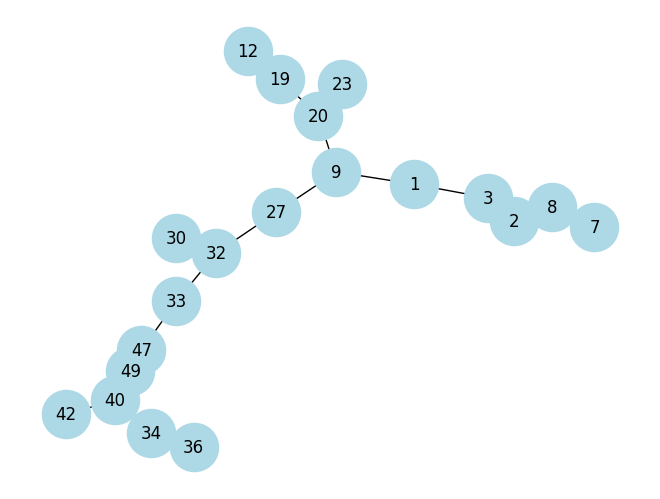

In [19]:
# Создание бинарного дерева
root = create_binary_tree(random.sample(range(1,50), 20))

visualize_tree(root)

## Поиск в глубину (DFS)

In [23]:
def depth_first_search(node, value):
    if node is None or node.value == value:
        return node
    elif value < node.value:
        return depth_first_search(node.left, value)
    else:
        return depth_first_search(node.right, value)

In [25]:
value = 12
result = depth_first_search(root, value=12)

if result is not None:
    print(f"Значение {value} найдено")
else:
    print(f"Нет такого значения в дереве")

Значение 12 найдено
